In [35]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [36]:
import numpy as np
import pandas as pd
from pysr import PySRRegressor
from IPython.display import HTML
from matplotlib import pyplot as plt

from hyperfit.linfit import LinFit
import functions
import old_relations
import new_relations
from ltsfit import lts_planefit

## Check the scatter with Milky Way

In [17]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
paras=['tan_phi','log_v_max']
paras.append('M_BH')
stds=[]
for para in paras:
    stds.append(para+'_std')

    
df_=df[paras+stds].dropna(axis='index',how='any')
df_=df_[paras+stds]
    
print(len(df_))

42


In [18]:
np.median((df_['tan_phi']))

0.23731179349999998

In [19]:
np.median(10**df_['log_v_max'])

210.4999999920144

In [20]:
normalization=np.array([np.median((df_['tan_phi'])),np.median(10**df_['log_v_max'])])
normalization

array([  0.23731179, 210.49999999])

In [21]:
normalization[1]=np.log10(normalization[1])
    
xs=np.array(df_[paras]).transpose()
errs=np.array(df_[stds]).transpose()
cov=np.zeros((len(paras),len(paras),len(df_)))

for i in range(len(normalization)):
    xs[i]=xs[i]-normalization[i]
    
for i in range(len(paras)):
    cov[i,i,:]=errs[i]**2

In [22]:
normalization

array([0.23731179, 2.3232521 ])

In [23]:
bounds = ((-5.7, -5.6),(3.9, 4.1),(7.44,7.45),(1.0e-5, 1.0))

/home/zj448/miniconda3/lib/python3.9/site-packages/emcee/moves/red_blue.py:99: RuntimeWarning: invalid value encountered in scalar subtract
  lnpdiff = f + nlp - state.log_prob[j]


[-5.57036949  3.95606781  7.31355597  0.28033118] [0.05754948 0.05695692 0.05978763 0.05511934]


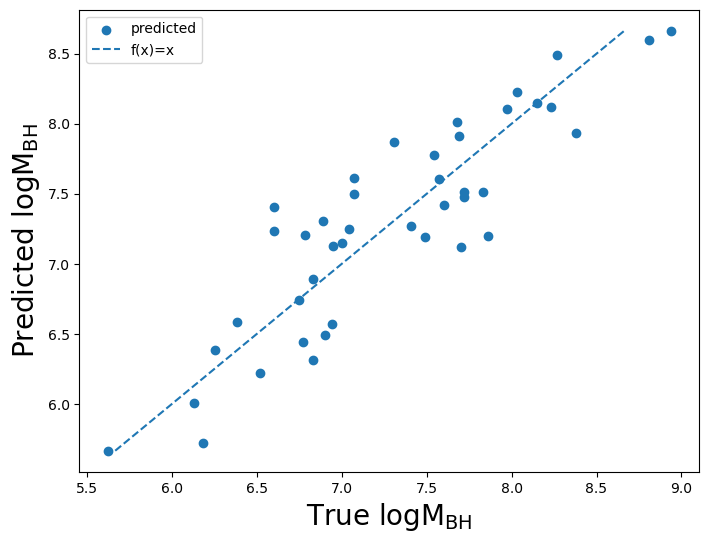

rmse: 0.3214763825620036
un-weight rmse: 0.34967583417163434


(array([-5.57036949,  3.95606781,  7.31355597,  0.28033118]),
 array([0.05754948, 0.05695692, 0.05978763, 0.05511934]))

In [24]:
hf = LinFit(xs, cov)

mcmc_samples, mcmc_lnlike = hf.emcee(bounds, verbose=False)
print(np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1))



c=np.mean(mcmc_samples, axis=1)
y=xs[-1]
y_pred=0
for i in range(len(c)-2):
    y_pred+=c[i]*xs[i]
y_pred+=c[-2]

plt.figure(figsize=(8,6))
plt.scatter(y,y_pred,label='predicted')
plt.plot(np.linspace(y_pred.min(),y_pred.max()),np.linspace(y_pred.min(),y_pred.max()),ls='--',label='f(x)=x')
plt.xlabel(r'True $\rm{log} M_{BH}$',fontsize=20)
plt.ylabel(r'Predicted $\rm{log} M_{BH}$',fontsize=20)
plt.legend()
plt.show()

w = 1/errs[-1]**2
print('rmse:',np.sqrt(np.average((y-y_pred)**2,weights=w)))
print('un-weight rmse:',np.sqrt(np.average((y-y_pred)**2)))
np.mean(mcmc_samples, axis=1), np.std(mcmc_samples, axis=1)

41


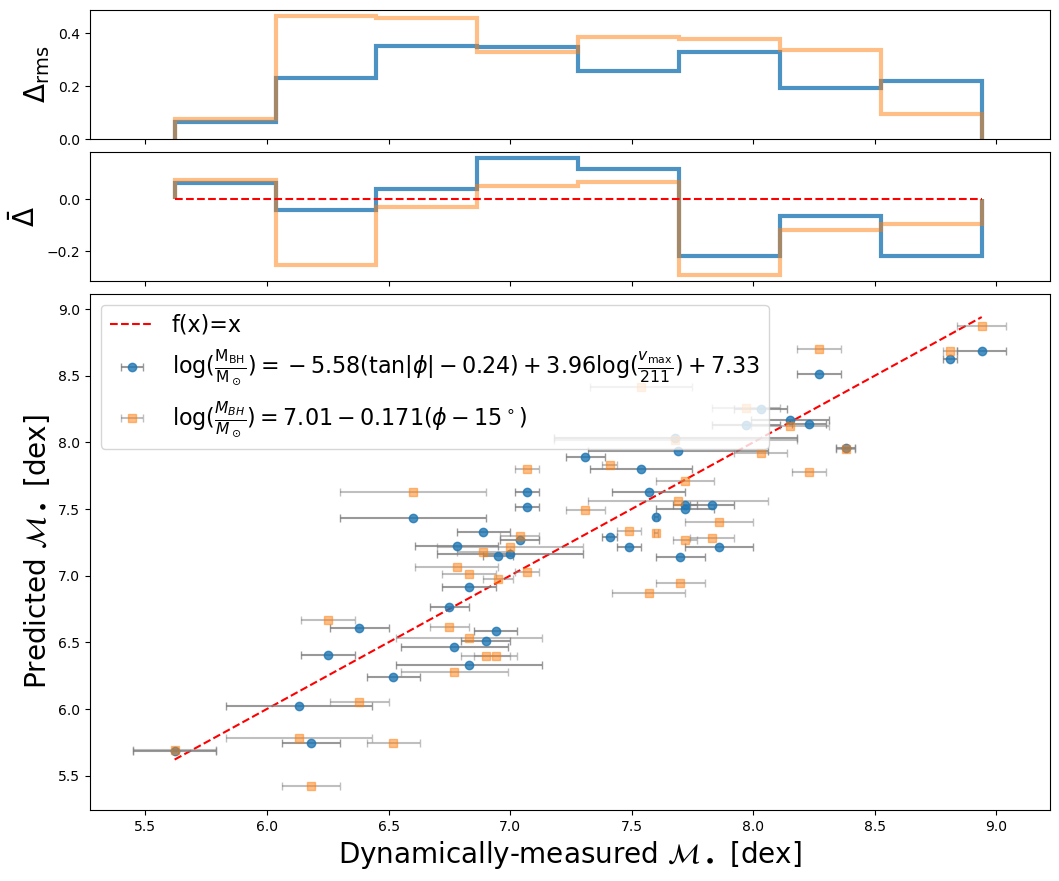

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.3311469717427208


In [25]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

42


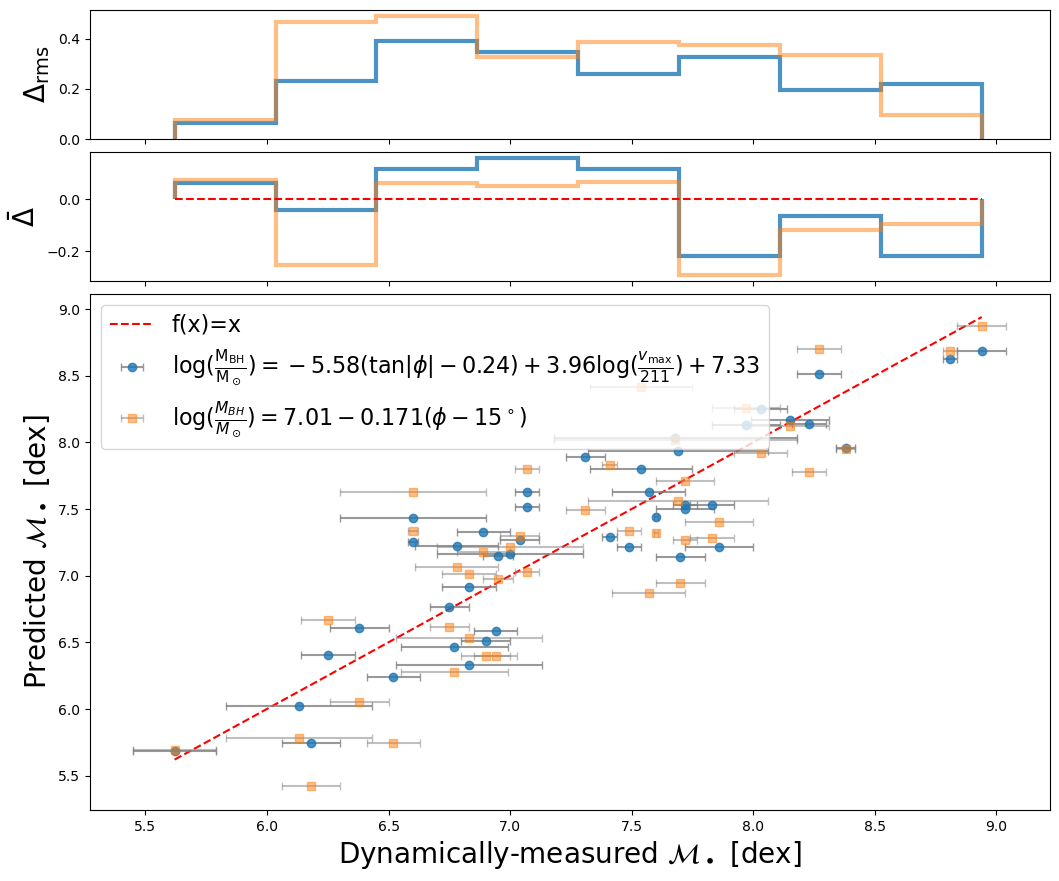

N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4058537080339953


In [26]:
functions.plot_relation(['tan_phi','log_v_max'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

42


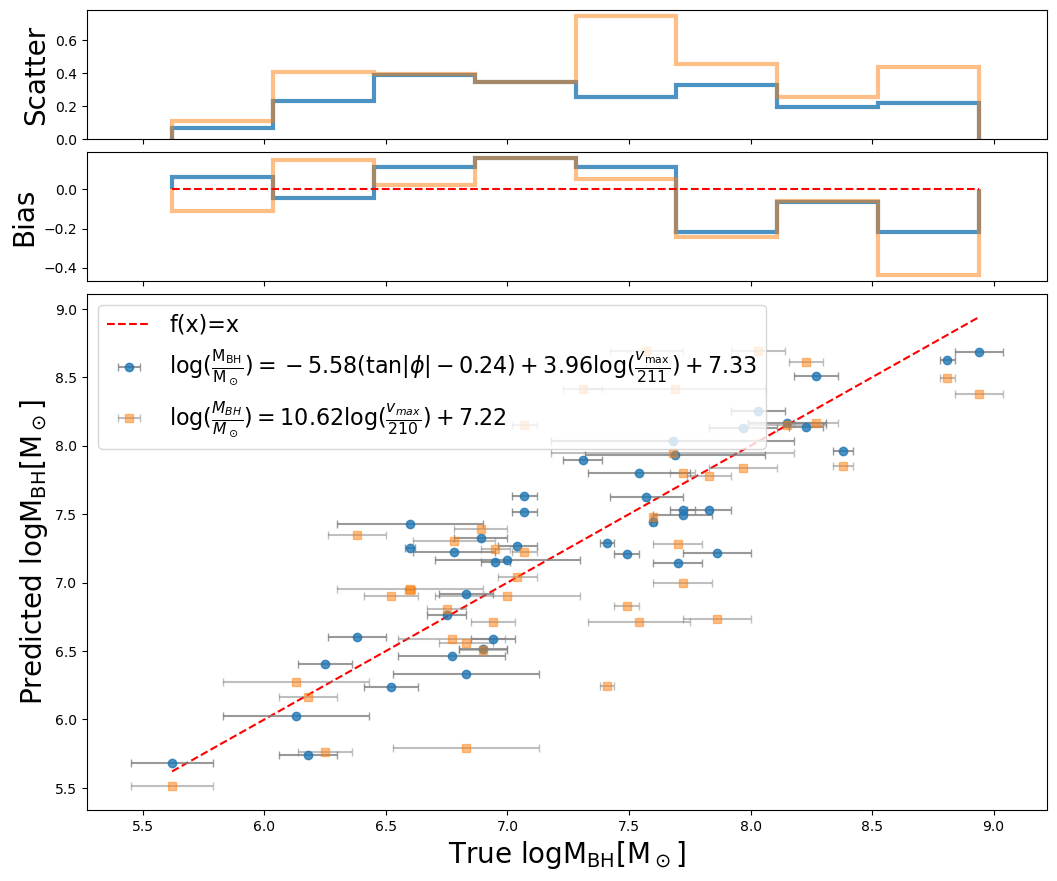

N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4278506220992225


In [55]:
functions.plot_relation(['tan_phi','log_v_max'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='log_v_max',reference_relation=old_relations.m_vmax_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 10.62 \log (\frac{v_{max}}{210})+7.22$',
                       loc='upper left')

## normalized

\begin{equation}
\log (\frac{\text{M}_\text{BH}}{\text{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\text{max}}{211}) + 7.33
\end{equation}

$\epsilon= 0.22035827$

$\epsilon= 0.22$

\begin{equation}
\log (\frac{\text{M}_\text{BH}}{\text{M}_\odot})= (-5.58\pm{0.056}) (\tan|\phi| - 0.24) + (3.96\pm{0.058}) \log(\frac{v_\text{max}}{211}) + (7.33\pm{0.055})
\end{equation}

$\epsilon= 0.22035827\pm0.06387363$

$\epsilon= 0.22\pm0.064$

In [27]:
def phi_v_normalized_relation(tan_phi,log_v_max,place_holder=0):
    norm_phi = 0.2382336
    norm_v = 2.32428246
    tan_phi = tan_phi - norm_phi
    log_v_max = log_v_max - norm_v
    a = -5.58189854
    b = 3.95991274
    c = 7.33367282
    return a*tan_phi+b*log_v_max+c

41


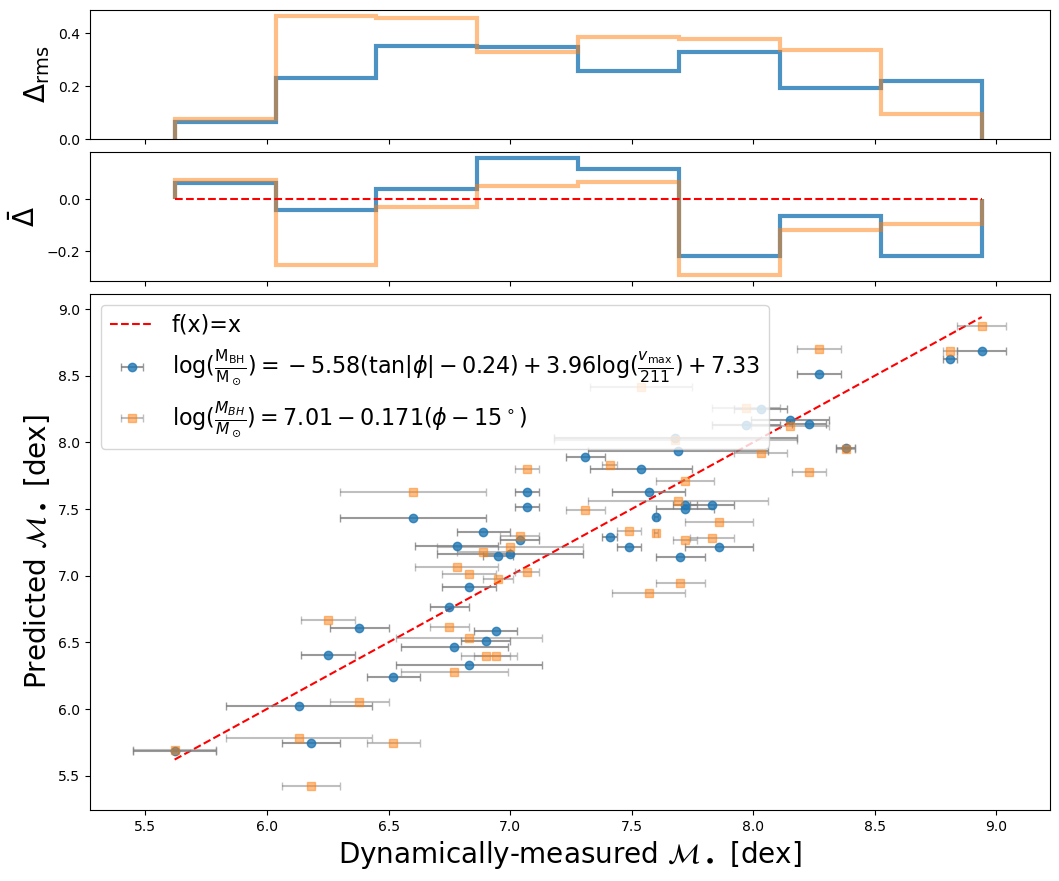

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.3311469717427208


In [28]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='tan_phi',reference_relation=old_relations.m_phi_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 7.01-0.171(\phi-15^\circ)$',
                       loc='upper left')

41


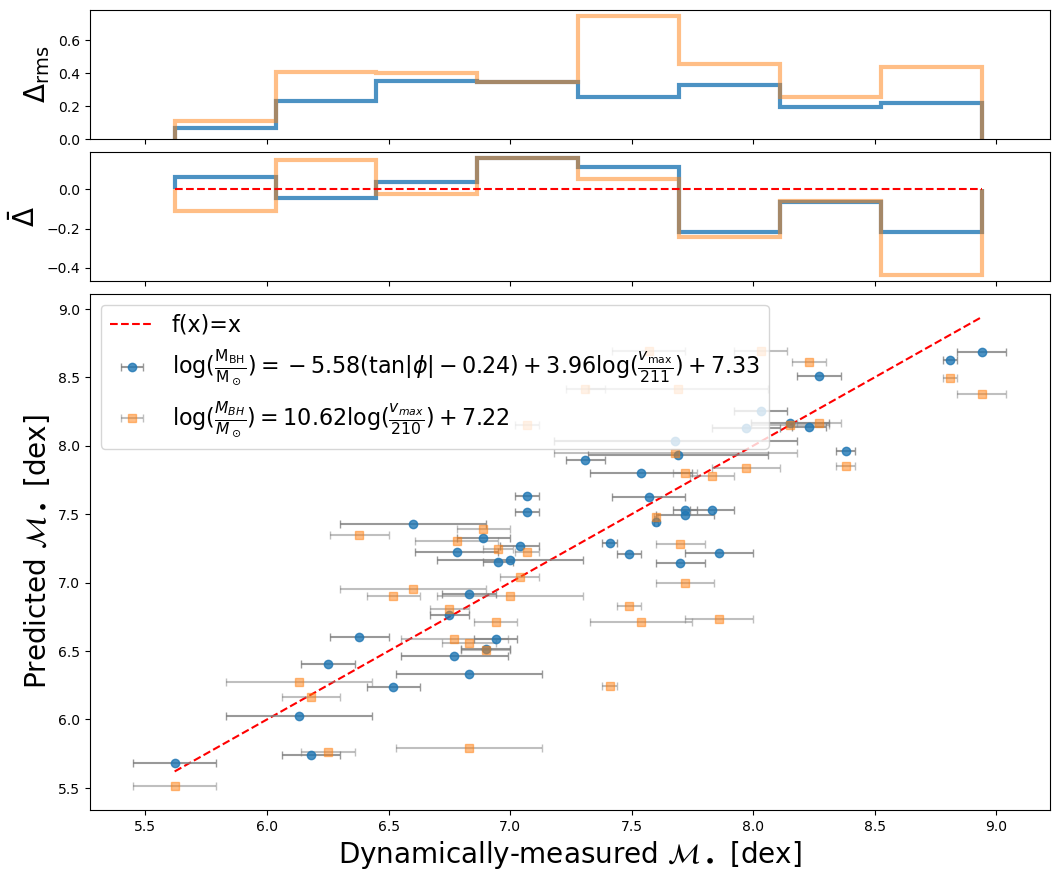

N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.43826998334985934


In [21]:
functions.plot_relation(['tan_phi','log_v_max','bri25'],phi_v_normalized_relation,label=r'$\log (\frac{\mathrm{M}_\mathrm{BH}}{\mathrm{M}_\odot})= -5.58 (\tan|\phi| - 0.24) + 3.96 \log(\frac{v_\mathrm{max}}{211}) + 7.33$',
                reference='log_v_max',reference_relation=old_relations.m_vmax_relation,reference_name=r'$\log (\frac{{M}_{BH}}{{M}_\odot})= 10.62 \log (\frac{v_{max}}{210})+7.22$',
                       loc='upper left')

In [11]:
df_=obs

In [52]:
def plot_3d(x,y,z,c,elev=30,azim=None,roll=None,xlabelpad=None,ylabelpad=None,zlabelpad=-30):
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)
    c=np.array(c)
    
    fs=20
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev,azim=azim,roll=roll)

    #plot = ax.scatter(x, y, z,c=c, alpha=0.4, s=10, label='fundamental plane')
    plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
    #ax.plot([0.08,0.695],[1.5,2.4],[5.0,5.0],color='red',alpha=0.5,ls='--',label=r'$\rm{log} [M_{BH}/M_\odot]$=5.0')
    ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
    ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs,labelpad=xlabelpad)
    ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs,labelpad=ylabelpad)
    #ax.set_yticklabels([])
    #ax.set_xticklabels([])
    #ax.set_zlabel(r'$\rm{log} [M_{BH}/M_\odot]$',fontsize=fs,labelpad=-30)
    ax.set_zlabel(r'$\rm{log} [M_{\bullet}/M_\odot]$',fontsize=fs,labelpad=zlabelpad)
    #ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
    #fig.colorbar(plot, ax=ax)
    plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))
    plt.savefig('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/FP41.pdf')
    plt.show()    
    return None

In [26]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
obs = df[['tan_phi','log_v_max','dc']].dropna(axis='index',how='any')
obs['tan_phi'].min(),obs['tan_phi'].max(),obs['log_v_max'].min(),obs['log_v_max'].max()

(0.071680891, 0.451517313, 2.161368002, 2.461093156)

In [40]:
xmin,xmax=0.050, 0.50
ymin,ymax=2.10, 2.50
#zmin,zmax=1, 80
bins=30
x=np.linspace(xmin,xmax,bins)
y=np.linspace(ymin,ymax,bins)
#z=np.linspace(zmin,zmax,bins)

In [41]:
#xx,yy,zz=np.meshgrid(x,y,z)
xx,yy=np.meshgrid(x,y)

In [42]:
#c = phi_v_dc_normalized_relation(xx,yy,zz)
#c[c<=5]=0
#c[c>5]=1
#c[(c<4.95)|(c>5.05)]=10
#c[(c>4.95)&(c<5.05)]=0
zz=phi_v_normalized_relation(xx,yy)

In [43]:
c=np.ones(zz.shape)

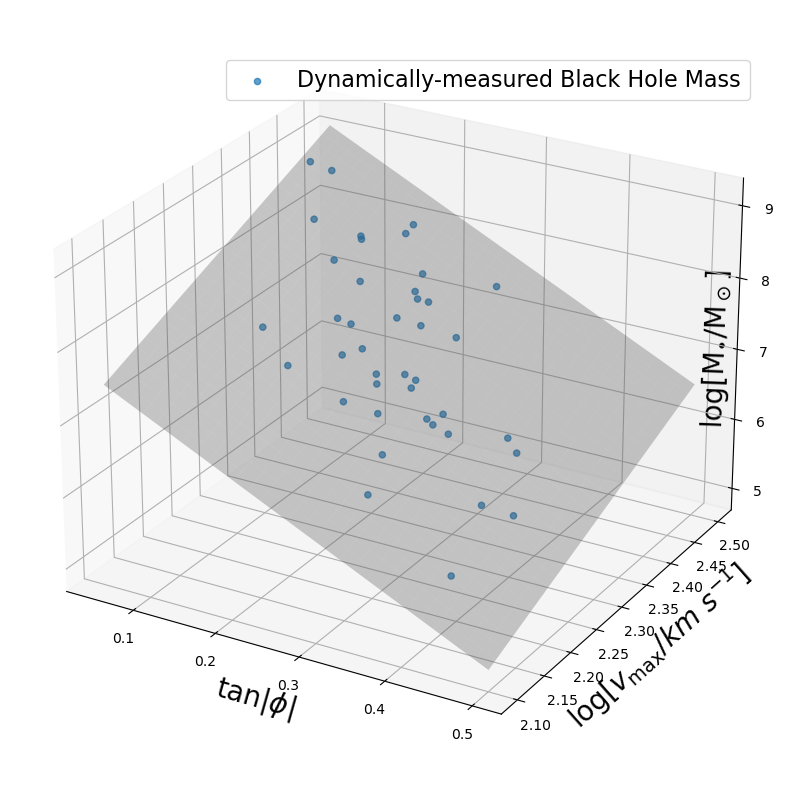

In [34]:
plot_3d(xx,yy,zz,c,elev=25)

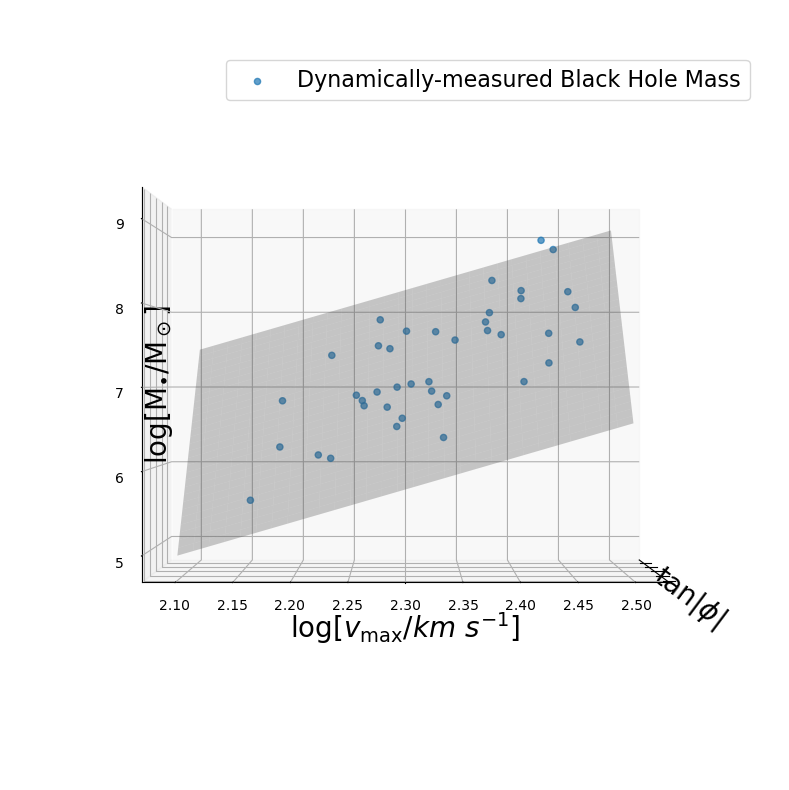

In [53]:
plot_3d(xx,yy,zz,c,elev=0,azim=0,xlabelpad=0,ylabelpad=10) 

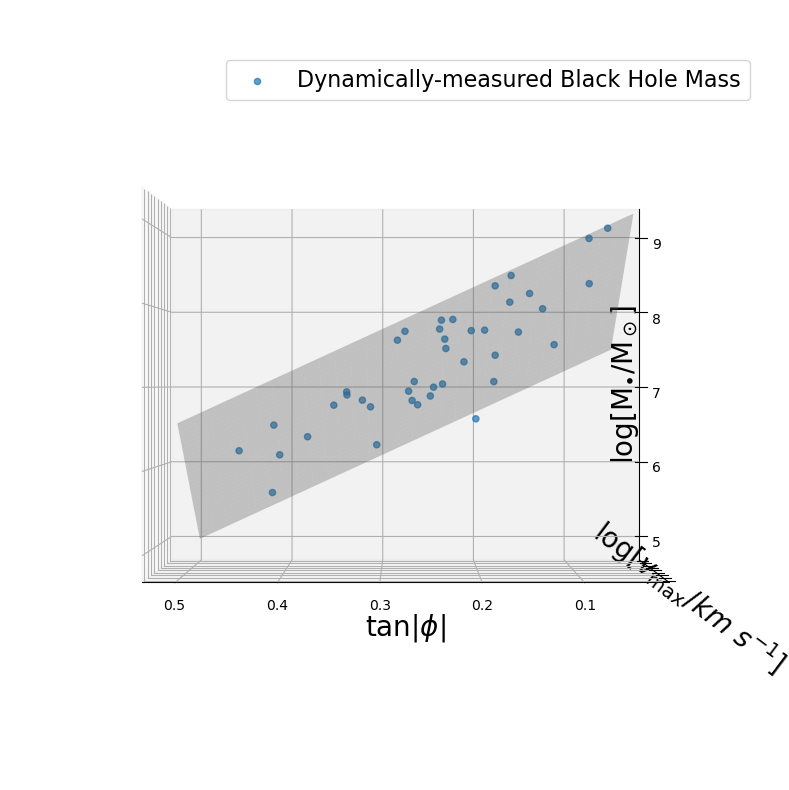

In [51]:
plot_3d(xx,yy,zz,c,elev=0,azim=90,xlabelpad=10,ylabelpad=0)

In [12]:
len(df_)

41

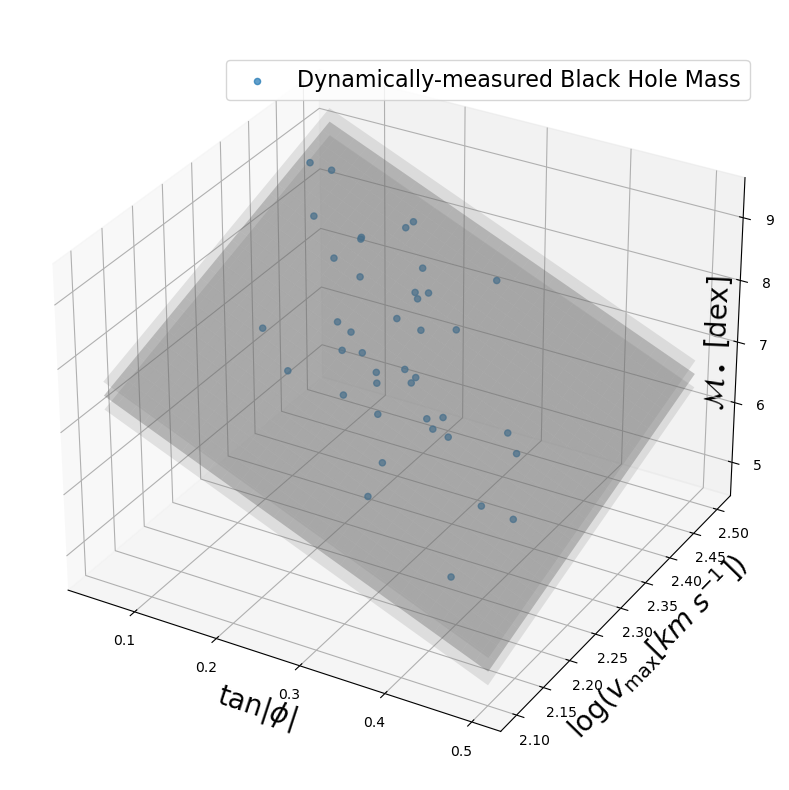

In [44]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=elev,azim=azim,roll=roll)

plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.plot_surface(x, y, z+0.22, alpha=0.20,color='lightgrey')
ax.plot_surface(x, y, z-0.22, alpha=0.20,color='lightgrey')
ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))

In [13]:
df_=obs

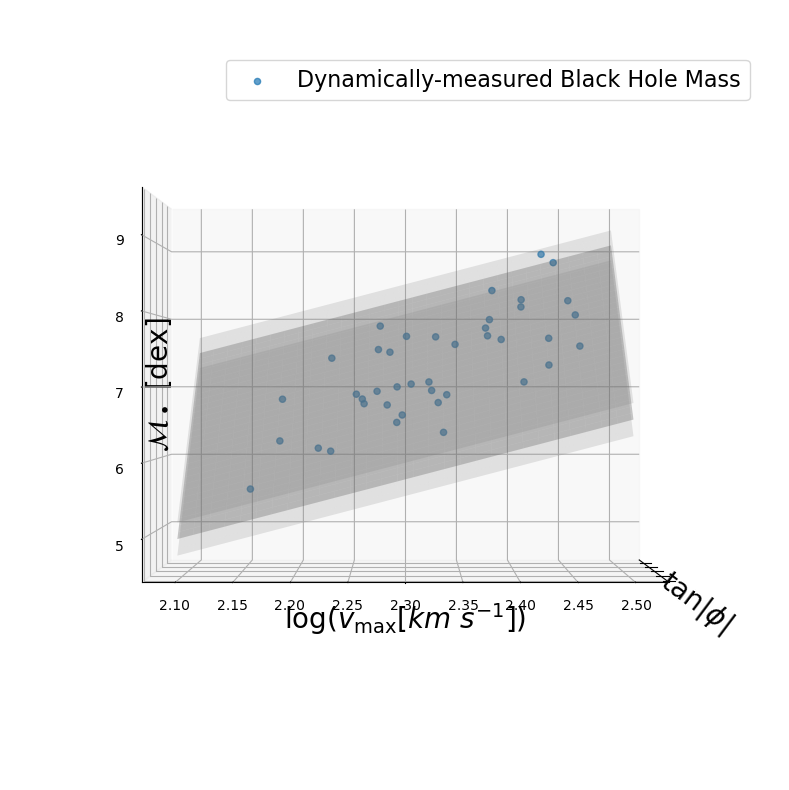

In [19]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0,azim=0)

plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.plot_surface(x, y, z+0.22, alpha=0.20,color='lightgrey')
ax.plot_surface(x, y, z-0.22, alpha=0.20,color='lightgrey')
ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
ax.set_xticklabels([])
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))

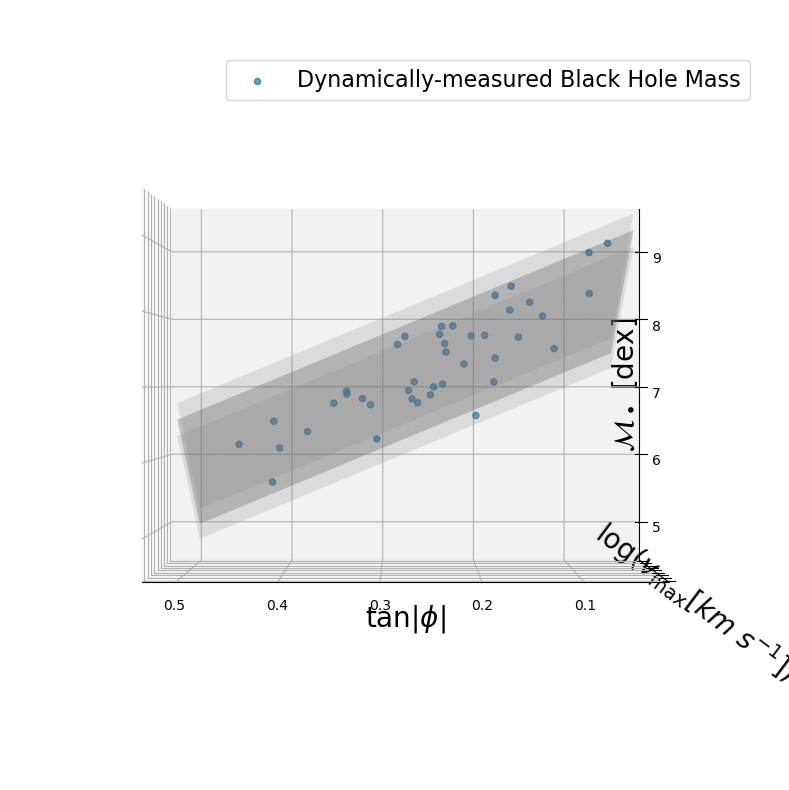

In [20]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=0,azim=90)

plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.plot_surface(x, y, z+0.22, alpha=0.20,color='lightgrey')
ax.plot_surface(x, y, z-0.22, alpha=0.20,color='lightgrey')
ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
ax.set_yticklabels([])
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))

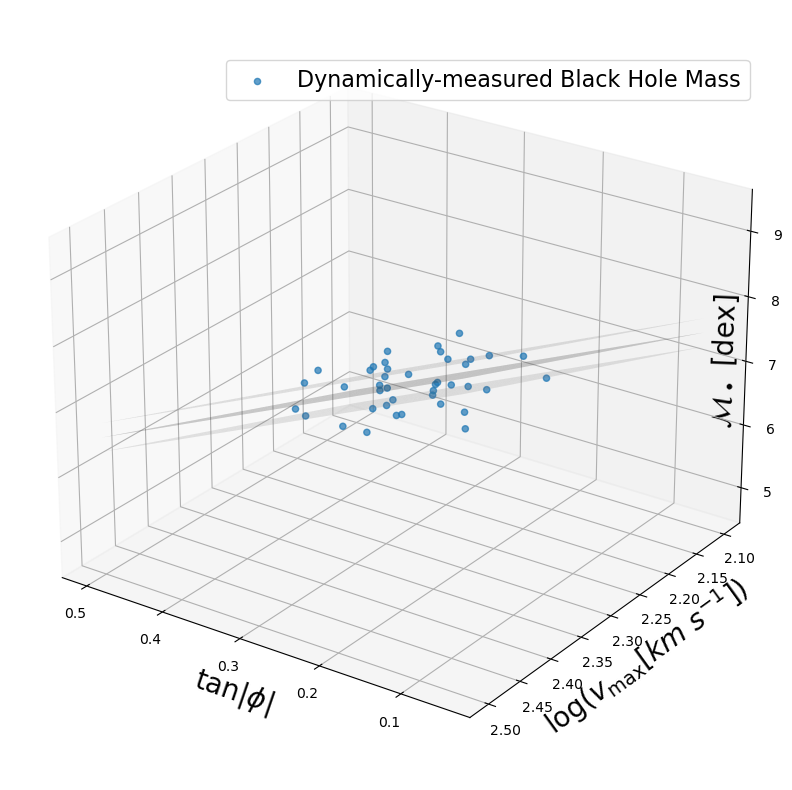

In [34]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=25,azim=125)

plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.plot_surface(x, y, z+0.22, alpha=0.20,color='lightgrey')
ax.plot_surface(x, y, z-0.22, alpha=0.20,color='lightgrey')
ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))

In [44]:
len(df_)

41

In [45]:
from matplotlib import animation
from IPython.display import HTML

def init():
    ax.view_init(elev=10., azim=0)
    return [plot]


def animate(i):
    ax.view_init(elev=10., azim=i)
    return [plot]


# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)


# Save
#anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [111]:
HTML(anim.to_html5_video())

In [47]:
# save as mp4, using codec h.264
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/FP41_anim.mp4', fps=30, codec='h264')

In [149]:
# To save the animation using Pillow as a gif
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Zehao Jin'),
                                 bitrate=1800)
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/FP41_anim.gif', writer=writer)

In [55]:
# with MW
df_=obs

In [56]:
len(df_)

41

In [57]:
def plot_3d(x,y,z,c,elev=30,azim=None,roll=None):
    x=np.array(x)
    y=np.array(y)
    z=np.array(z)
    c=np.array(c)
    
    fs=20
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(111, projection='3d')
    ax.view_init(elev=elev,azim=azim,roll=roll)

    #plot = ax.scatter(x, y, z,c=c, alpha=0.4, s=10, label='fundamental plane')
    plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
    #ax.plot([0.08,0.695],[1.5,2.4],[5.0,5.0],color='red',alpha=0.5,ls='--',label=r'$\rm{log} [M_{BH}/M_\odot]$=5.0')
    ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
    ax.scatter(obs_MW.iloc[2]['tan_phi'],obs_MW.iloc[2]['log_v_max'],obs_MW.iloc[2]['M_BH'],alpha=0.7,marker='*',s=100,c='#d62728')
    
    ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
    ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
    #ax.set_zlabel(r'$\rm{log} [M_{BH}/M_\odot]$',fontsize=fs,labelpad=-30)
    ax.set_zlabel(r'$\rm{log} [M_{\bullet}/M_\odot]$',fontsize=fs,labelpad=-30)
    #ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
    #fig.colorbar(plot, ax=ax)
    plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))
    plt.savefig('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/FP42.pdf')
    plt.show()    
    return None

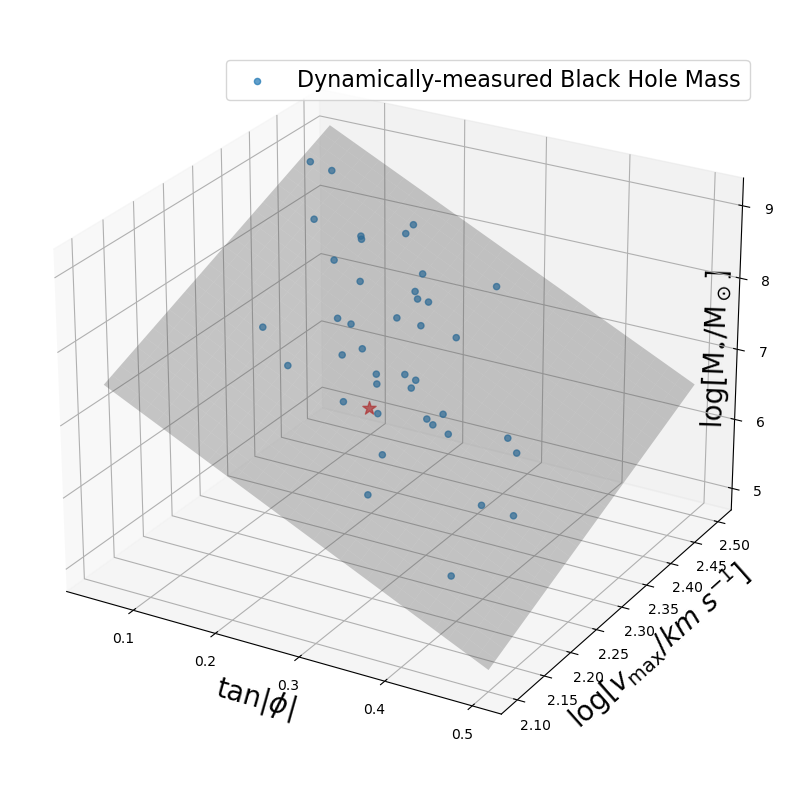

In [58]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
obs = df[['tan_phi','log_v_max','dc']].dropna(axis='index',how='any')
obs['tan_phi'].min(),obs['tan_phi'].max(),obs['log_v_max'].min(),obs['log_v_max'].max()

xmin,xmax=0.050, 0.50
ymin,ymax=2.10, 2.50
#zmin,zmax=1, 80
bins=30
x=np.linspace(xmin,xmax,bins)
y=np.linspace(ymin,ymax,bins)
#z=np.linspace(zmin,zmax,bins)

#xx,yy,zz=np.meshgrid(x,y,z)
xx,yy=np.meshgrid(x,y)

#c = phi_v_dc_normalized_relation(xx,yy,zz)
#c[c<=5]=0
#c[c>5]=1
#c[(c<4.95)|(c>5.05)]=10
#c[(c>4.95)&(c<5.05)]=0
zz=phi_v_normalized_relation(xx,yy)

c=np.ones(zz.shape)

plot_3d(xx,yy,zz,c,elev=25)

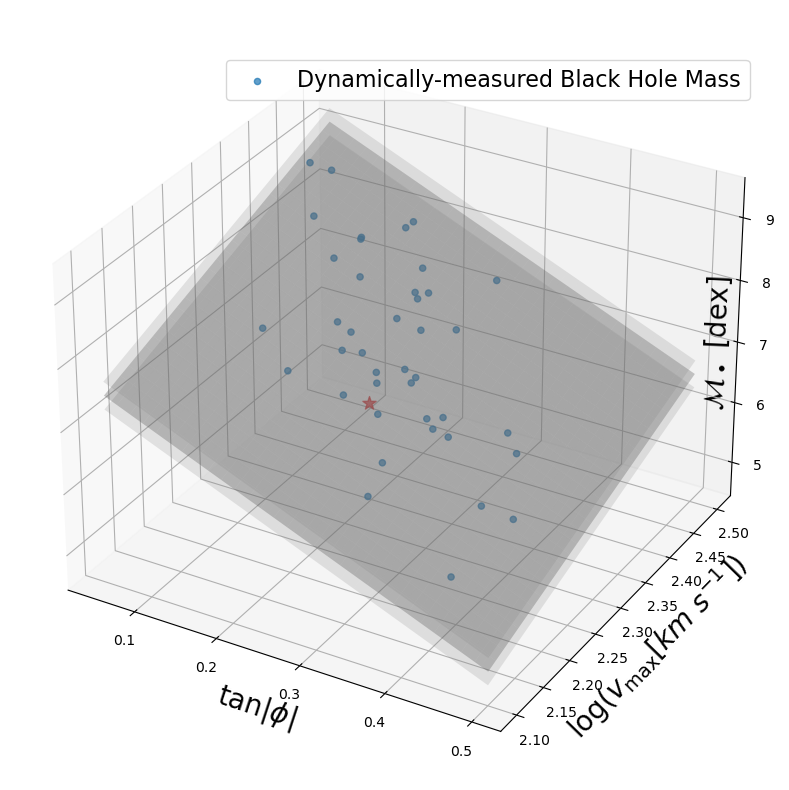

In [59]:
x=np.array(xx)
y=np.array(yy)
z=np.array(zz)
c=np.array(c)
    
fs=20
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
#ax.view_init(elev=elev,azim=azim,roll=roll)

plot=ax.plot_surface(x, y, z, alpha=0.3,color='grey')
ax.plot_surface(x, y, z+0.22, alpha=0.20,color='lightgrey')
ax.plot_surface(x, y, z-0.22, alpha=0.20,color='lightgrey')
ax.scatter(df_['tan_phi'],df_['log_v_max'],df_['M_BH'],alpha=0.7,label='Dynamically-measured Black Hole Mass')
ax.scatter(obs_MW.iloc[2]['tan_phi'],obs_MW.iloc[2]['log_v_max'],obs_MW.iloc[2]['M_BH'],alpha=0.7,marker='*',s=100,c='#d62728')
    
ax.set_xlabel(r'$\tan|\phi|$',fontsize=fs)
#ax.set_ylabel(r'$\log [v_\mathrm{max}/km\ s^{-1}]$',fontsize=fs)
ax.set_ylabel(r'$\log (v_\mathrm{max}[km\ s^{-1}])$',fontsize=fs)
ax.set_zlabel(r'$\mathcal{M}_\bullet$ [dex]',fontsize=fs,labelpad=-30)
#ax.set_box_aspect([np.ptp(i) for i in (x,y,z)]) 
#fig.colorbar(plot, ax=ax)
plt.legend(fontsize=fs*0.8,loc='upper right',bbox_to_anchor=(0.975, 0.95))

In [60]:
# Animate
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=360, interval=20, blit=True)

In [144]:
HTML(anim.to_html5_video())

In [1]:
writer = animation.PillowWriter(fps=15,
                                 metadata=dict(artist='Zehao Jin'),
                                 bitrate=1800)
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/IMBH_paper/FP_pred_anim.gif', writer=writer)

NameError: name 'animation' is not defined

In [61]:
# save as mp4, using codec h.264
anim.save('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/FP42_anim.mp4', fps=30, codec='h264')

In [37]:
def phi_v_normalized_relation(tan_phi,log_v_max,place_holder=0):
    norm_phi = 0.2382336
    norm_v = 2.32428246
    tan_phi = tan_phi - norm_phi
    log_v_max = log_v_max - norm_v
    a = -5.58189854
    b = 3.95991274
    c = 7.33367282
    return a*tan_phi+b*log_v_max+c

In [38]:
def scatter_residual(x, y, xerr, fmt, alpha, label, ax, ax_histx1, ax_histx2, bins=12):
    # no labels
    ax_histx1.tick_params(axis="x", labelbottom=False)
    ax_histx2.tick_params(axis="x", labelbottom=False)
    # the scatter plot:
    ax.errorbar(x,y,xerr=xerr,fmt=fmt,ecolor='grey',capsize=3, alpha=alpha,label=label)

    # x hist
    #w = 1/xerr**2
    num,edges=np.histogram(x,bins)
    #hist, _ = np.histogram(x, bins=edges, weights=residual*w/w.mean())
    hist, _ = np.histogram(x, bins=edges, weights=(y-x))
    ax_histx2.stairs(hist/num,edges,lw=3,alpha=alpha)

    hist, _ = np.histogram(x, bins=edges, weights=np.sqrt((y-x)**2))
    ax_histx1.stairs(hist/num,edges,lw=3,alpha=alpha)

In [39]:
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
paras=['tan_phi','log_v_max']

if paras[-1]!='M_BH':
    paras.append('M_BH')

paras.append('M_BH_std')

obs = df[paras].dropna(axis='index',how='any')
obs = obs.drop(index=101) # drop Milky Way

print(len(obs))

y=obs['M_BH'].to_numpy()
yerr=obs['M_BH_std'].to_numpy()

x=[]
for i in range(len(paras)-(2)):
    x.append(obs.iloc[:,i].to_numpy())

y_pred=phi_v_normalized_relation(*x)

41


N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.3311469717427208
N-D relation wrmse: 0.2327150003130202
1-D relation wrmse: 0.43826998334985934


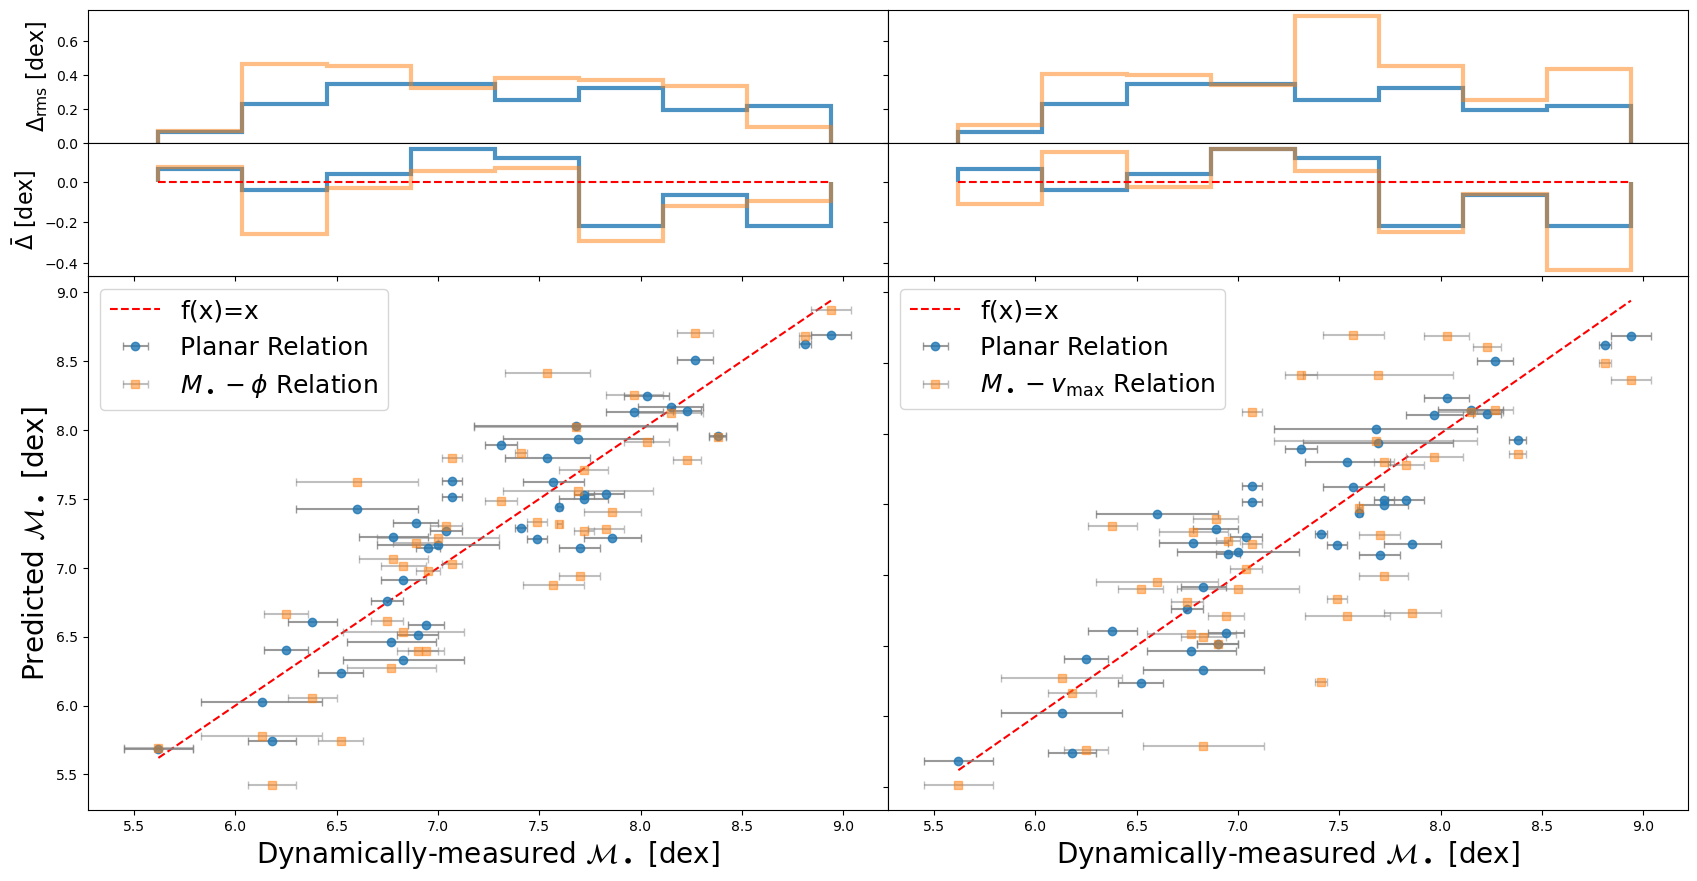

In [23]:
# Start with a square Figure.
fig = plt.figure(figsize=(20,10))
fs=20
bins=8
label='Planar Relation'
labelamp=.9
# Add a gridspec
gs = fig.add_gridspec(3, 2,  height_ratios=(1, 1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0)
# Create the Axes.
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])

ax_histx00 = fig.add_subplot(gs[0, 0], sharex=ax20)
ax_histx10 = fig.add_subplot(gs[1, 0], sharex=ax20)

ax_histx01 = fig.add_subplot(gs[0, 1], sharex=ax21, sharey=ax_histx00)
ax_histx11 = fig.add_subplot(gs[1, 1], sharex=ax21, sharey=ax_histx10)

ax21.tick_params(axis='y', which='both',labelleft=False)
ax_histx10.tick_params(axis='x', which='both',labelbottom=False)
ax_histx11.tick_params(axis='x', which='both',labelbottom=False)
ax_histx11.tick_params(axis='y', which='both',labelleft=False)
ax_histx01.tick_params(axis='y', which='both',labelleft=False)

# Draw the f(x)=x line
minrange=np.array([y.min(),y_pred.min()]).min()
maxrange=np.array([y.max(),y_pred.max()]).max()
ax20.plot(np.linspace(minrange,maxrange),np.linspace(minrange,maxrange),label='f(x)=x',c='r',ls='--')
ax21.plot(np.linspace(minrange,maxrange),np.linspace(minrange,maxrange),label='f(x)=x',c='r',ls='--')
ax_histx10.plot(np.linspace(minrange,maxrange),np.zeros(len(np.linspace(minrange,maxrange))),c='r',ls='--')
ax_histx11.plot(np.linspace(minrange,maxrange),np.zeros(len(np.linspace(minrange,maxrange))),c='r',ls='--')

# Draw the scatter plot and marginals.
## new relation
scatter_residual(y,y_pred,yerr,'o',0.8,label,
                     ax20, ax_histx00, ax_histx10, bins=bins)
scatter_residual(y,y_pred,yerr,'o',0.8,label,
                     ax21, ax_histx01, ax_histx11, bins=bins)

## reference relation
reference_relation = old_relations.m_phi_relation
reference = 'tan_phi'
y_pred_ref=reference_relation(obs[reference])
scatter_residual(y,y_pred_ref,yerr,'s',0.5,r'$M_\bullet - \phi$ Relation',
                    ax20, ax_histx00, ax_histx10, bins=bins)

w = 1/yerr**2
#print('obs rmse:',rmse(y,y_pred))
print('N-D relation wrmse:',functions.wrmse(y,y_pred,w))
print('1-D relation wrmse:',functions.wrmse(y,y_pred_ref,1/yerr**2))

reference_relation = old_relations.m_vmax_relation
reference = 'log_v_max'
y_pred_ref=reference_relation(obs[reference])
scatter_residual(y,y_pred_ref,yerr,'s',0.5,r'$M_\bullet - v_\mathrm{max}$ Relation',
                    ax21, ax_histx01, ax_histx11, bins=bins)

w = 1/yerr**2
#print('obs rmse:',rmse(y,y_pred))
print('N-D relation wrmse:',functions.wrmse(y,y_pred,w))
print('1-D relation wrmse:',functions.wrmse(y,y_pred_ref,1/yerr**2))

ax20.set_xlabel(r'Dynamically-measured $\mathcal{M}_\bullet$ [dex]',fontsize=fs)
ax21.set_xlabel(r'Dynamically-measured $\mathcal{M}_\bullet$ [dex]',fontsize=fs)
ax20.set_ylabel(r'Predicted $\mathcal{M}_\bullet$ [dex]',fontsize=fs)

ax_histx10.set_ylabel(r'$\bar{\Delta}$ [dex]',fontsize=fs*0.8)
ax_histx00.set_ylabel(r'$\Delta_\mathrm{rms}$ [dex]',fontsize=fs*0.8)

ax20.legend(fontsize=fs*labelamp,loc='upper left')
ax21.legend(fontsize=fs*labelamp,loc='upper left')
plt.savefig('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/bicomp.pdf')
plt.show()

In [48]:
# with MW
df=pd.read_csv('SMBH_Data_0504.csv',header=1)
paras=['tan_phi','log_v_max']

if paras[-1]!='M_BH':
    paras.append('M_BH')

paras.append('M_BH_std')

obs = df[paras].dropna(axis='index',how='any')
obs_MW = obs
#obs = obs.drop(index=101) # drop Milky Way

print(len(obs))

y=obs['M_BH'].to_numpy()
yerr=obs['M_BH_std'].to_numpy()

x=[]
for i in range(len(paras)-(2)):
    x.append(obs.iloc[:,i].to_numpy())

y_pred=phi_v_normalized_relation(*x)

42


In [49]:
obs.iloc[2]

tan_phi      0.232707
log_v_max    2.296665
M_BH         6.600000
M_BH_std     0.020000
Name: 101, dtype: float64

N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4058537080339953
N-D relation wrmse: 0.3195867016049452
1-D relation wrmse: 0.4278506220992225


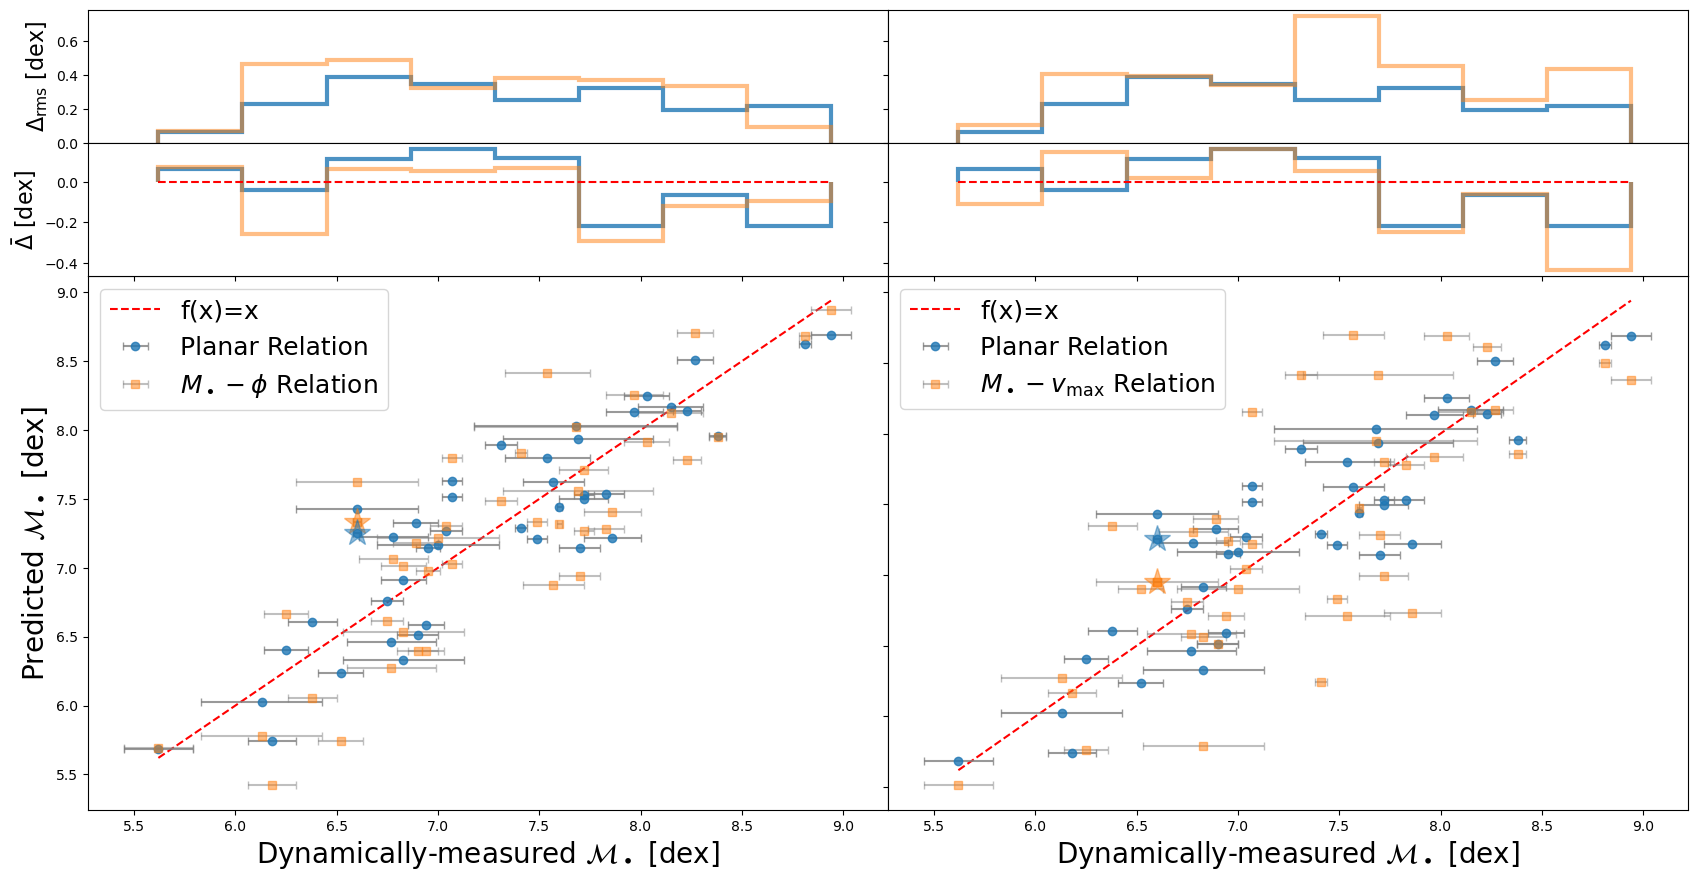

In [50]:
# Start with a square Figure.
fig = plt.figure(figsize=(20,10))
fs=20
bins=8
label='Planar Relation'
labelamp=.9
# Add a gridspec
gs = fig.add_gridspec(3, 2,  height_ratios=(1, 1, 4),
                      left=0.1, right=0.9, bottom=0.1, top=0.9,
                      wspace=0, hspace=0)
# Create the Axes.
ax20 = fig.add_subplot(gs[2, 0])
ax21 = fig.add_subplot(gs[2, 1])

ax_histx00 = fig.add_subplot(gs[0, 0], sharex=ax20)
ax_histx10 = fig.add_subplot(gs[1, 0], sharex=ax20)

ax_histx01 = fig.add_subplot(gs[0, 1], sharex=ax21, sharey=ax_histx00)
ax_histx11 = fig.add_subplot(gs[1, 1], sharex=ax21, sharey=ax_histx10)

ax21.tick_params(axis='y', which='both',labelleft=False)
ax_histx10.tick_params(axis='x', which='both',labelbottom=False)
ax_histx11.tick_params(axis='x', which='both',labelbottom=False)
ax_histx11.tick_params(axis='y', which='both',labelleft=False)
ax_histx01.tick_params(axis='y', which='both',labelleft=False)

# Draw the f(x)=x line
minrange=np.array([y.min(),y_pred.min()]).min()
maxrange=np.array([y.max(),y_pred.max()]).max()
ax20.plot(np.linspace(minrange,maxrange),np.linspace(minrange,maxrange),label='f(x)=x',c='r',ls='--')
ax21.plot(np.linspace(minrange,maxrange),np.linspace(minrange,maxrange),label='f(x)=x',c='r',ls='--')
ax_histx10.plot(np.linspace(minrange,maxrange),np.zeros(len(np.linspace(minrange,maxrange))),c='r',ls='--')
ax_histx11.plot(np.linspace(minrange,maxrange),np.zeros(len(np.linspace(minrange,maxrange))),c='r',ls='--')

# Draw the scatter plot and marginals.
## new relation
scatter_residual(y,y_pred,yerr,'o',0.8,label,
                     ax20, ax_histx00, ax_histx10, bins=bins)
scatter_residual(y,y_pred,yerr,'o',0.8,label,
                     ax21, ax_histx01, ax_histx11, bins=bins)

## reference relation
reference_relation = old_relations.m_phi_relation
reference = 'tan_phi'
y_pred_ref=reference_relation(obs[reference])
scatter_residual(y,y_pred_ref,yerr,'s',0.5,r'$M_\bullet - \phi$ Relation',
                    ax20, ax_histx00, ax_histx10, bins=bins)
ax20.errorbar(obs_MW.iloc[2]['M_BH'],reference_relation(obs_MW.iloc[2][reference]),xerr=obs_MW.iloc[2]['M_BH_std'],
              fmt='*',ecolor='grey',capsize=3, alpha=0.5,markersize=20,markerfacecolor='#ff7f0e',markeredgecolor='#ff7f0e')
ax20.errorbar(obs_MW.iloc[2]['M_BH'],phi_v_normalized_relation(obs_MW.iloc[2]['tan_phi'],obs_MW.iloc[2]['log_v_max']),xerr=obs_MW.iloc[2]['M_BH_std'],
              fmt='*',ecolor='grey',capsize=3, alpha=0.5,markersize=20,markerfacecolor='#1f77b4',markeredgecolor='#1f77b4')

w = 1/yerr**2
#print('obs rmse:',rmse(y,y_pred))
print('N-D relation wrmse:',functions.wrmse(y,y_pred,w))
print('1-D relation wrmse:',functions.wrmse(y,y_pred_ref,1/yerr**2))

reference_relation = old_relations.m_vmax_relation
reference = 'log_v_max'
y_pred_ref=reference_relation(obs[reference])
scatter_residual(y,y_pred_ref,yerr,'s',0.5,r'$M_\bullet - v_\mathrm{max}$ Relation',
                    ax21, ax_histx01, ax_histx11, bins=bins)
ax21.errorbar(obs_MW.iloc[2]['M_BH'],reference_relation(obs_MW.iloc[2][reference]),xerr=obs_MW.iloc[2]['M_BH_std'],
              fmt='*',ecolor='grey',capsize=3, alpha=0.5,markersize=20,markerfacecolor='#ff7f0e',markeredgecolor='#ff7f0e')
ax21.errorbar(obs_MW.iloc[2]['M_BH'],phi_v_normalized_relation(obs_MW.iloc[2]['tan_phi'],obs_MW.iloc[2]['log_v_max']),xerr=obs_MW.iloc[2]['M_BH_std'],
              fmt='*',ecolor='grey',capsize=3, alpha=0.5,markersize=20,markerfacecolor='#1f77b4',markeredgecolor='#1f77b4')

w = 1/yerr**2
#print('obs rmse:',rmse(y,y_pred))
print('N-D relation wrmse:',functions.wrmse(y,y_pred,w))
print('1-D relation wrmse:',functions.wrmse(y,y_pred_ref,1/yerr**2))

ax20.set_xlabel(r'Dynamically-measured $\mathcal{M}_\bullet$ [dex]',fontsize=fs)
ax21.set_xlabel(r'Dynamically-measured $\mathcal{M}_\bullet$ [dex]',fontsize=fs)
ax20.set_ylabel(r'Predicted $\mathcal{M}_\bullet$ [dex]',fontsize=fs)

ax_histx10.set_ylabel(r'$\bar{\Delta}$ [dex]',fontsize=fs*0.8)
ax_histx00.set_ylabel(r'$\Delta_\mathrm{rms}$ [dex]',fontsize=fs*0.8)

ax20.legend(fontsize=fs*labelamp,loc='upper left')
ax21.legend(fontsize=fs*labelamp,loc='upper left')
plt.savefig('/home/zj448/Ultimate_black_hole_mass_scaling_relations_Symbolic_Regression/plots/Planar_relation/bicomp_MW.pdf')
plt.show()

In [10]:
(obs['M_BH'].max()-obs['M_BH'].min())/8

0.4149999999999999